# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from net_trainer import NetworkTrainer, BaseModel

# Start Network Trainer

In [3]:
kwargs = { 
    'exp_params' : {
        'name': 'train_mobilenetv2',
        'description': 'Training ResNet50V2-based network',
        'tags': ['resnet50-v2'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
        'tagger_model': OpenfaceMouth(),
        'dl_names': [DLName.FVC_PYBOSSA],
        'req': cts.ICAO_REQ.MOUTH,
        'aligned': True 
    },
    'net_train_params': {
        'batch_size': 64,
        'n_epochs': 30,
        'early_stopping': 30,
        'shuffle': False,
        'dense_units': 128,
        'learning_rate': 1e-3,
        'optimizer': 'Adam',
        'dropout': 0.5,
        'train_prop': 0.8,
        'validation_prop': 0.1,
        'test_prop': 0.1,
        'seed': 42,
        'validation_split': 0.2
    }
}

trainer = NetworkTrainer(base_model=BaseModel.RESNET50_V2, use_neptune=True, **kwargs)

-----
Use Neptune:  True
Base Model Name:  BaseModel.RESNET50_V2
-----
Args: 
{'exp_params': {'description': 'Training ResNet50V2-based network',
                'name': 'train_mobilenetv2',
                'src_files': ['net_trainer.py'],
                'tags': ['resnet50-v2']},
 'net_train_params': {'batch_size': 64,
                      'dense_units': 128,
                      'dropout': 0.5,
                      'early_stopping': 30,
                      'learning_rate': 0.001,
                      'n_epochs': 30,
                      'optimizer': 'Adam',
                      'seed': 42,
                      'shuffle': False,
                      'test_prop': 0.1,
                      'train_prop': 0.8,
                      'validation_prop': 0.1,
                      'validation_split': 0.2},
 'properties': {'aligned': True,
                'dl_names': [<DLName.FVC_PYBOSSA: 'fvc_pybossa'>],
                'req': <ICAO_REQ.MOUTH: 'mouth'>,
                'tagger_mode

# Load Data

In [4]:
trainer.load_training_data()

Loading data
Input data.shape: (5780, 4)
Number of Samples: 5780
Data loaded


# Data Balancing

In [5]:
trainer.balance_input_data()

Balancing input dataset..
df_comp.shape: (4568, 4), df_non_comp.shape: (1212, 4)
final_df.shape:  (2424, 4)
n_comp:  1212
n_non_comp:  1212
Input dataset balanced


# Data Generators

In [6]:
trainer.setup_data_generators()

Starting data generators
Found 1746 validated image filenames.
Found 436 validated image filenames.
Found 242 validated image filenames.
TOTAL: 2424


# Use Neptune

In [7]:
trainer.start_neptune()
trainer.create_experiment()

Starting Neptune
Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-58


# Training Model

In [8]:
trainer.train_model()

Training RESNET50_V2 network
94674944/94668760 [==============================] - 9s 0us/step
Epoch 1/30
27/27 [==============================] - 6s 226ms/step - loss: 0.8224 - accuracy: 0.5095 - val_loss: 0.6966 - val_accuracy: 0.4635
Epoch 2/30
27/27 [==============================] - 4s 138ms/step - loss: 0.6960 - accuracy: 0.4875 - val_loss: 0.6934 - val_accuracy: 0.4557
Epoch 3/30
27/27 [==============================] - 4s 140ms/step - loss: 0.6936 - accuracy: 0.4721 - val_loss: 0.6932 - val_accuracy: 0.4818
Epoch 4/30
27/27 [==============================] - 4s 140ms/step - loss: 0.6934 - accuracy: 0.4851 - val_loss: 0.6932 - val_accuracy: 0.4740
Epoch 5/30
27/27 [==============================] - 4s 137ms/step - loss: 0.6933 - accuracy: 0.4881 - val_loss: 0.6932 - val_accuracy: 0.4766
Epoch 6/30
27/27 [==============================] - 4s 135ms/step - loss: 0.6933 - accuracy: 0.4679 - val_loss: 0.6932 - val_accuracy: 0.4557
Epoch 7/30
27/27 [==============================] - 4s

# Plots

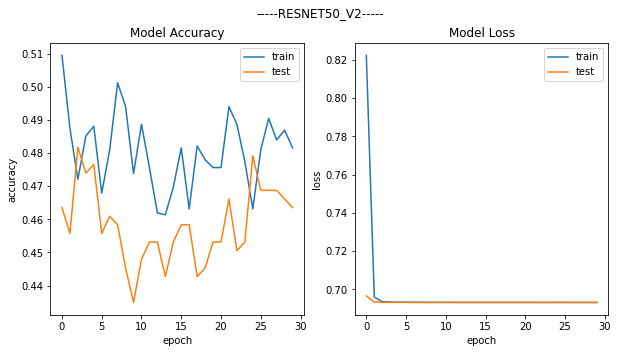

In [9]:
trainer.draw_training_history()

# Saving Trained Model

# Test Trained Model

In [10]:
trainer.test_model()

Testing Trained Model
              precision    recall  f1-score   support

    NON_COMP       0.54      0.66      0.59       137
        COMP       0.38      0.28      0.32       105

    accuracy                           0.49       242
   macro avg       0.46      0.47      0.46       242
weighted avg       0.47      0.49      0.48       242

Model Accuracy: 0.4917


# Evaluate Model

In [11]:
trainer.evaluate_model()

Evaluating model
TEST loss:  0.6932
TEST accuracy:  0.4917


# Vizualize Model Classification

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


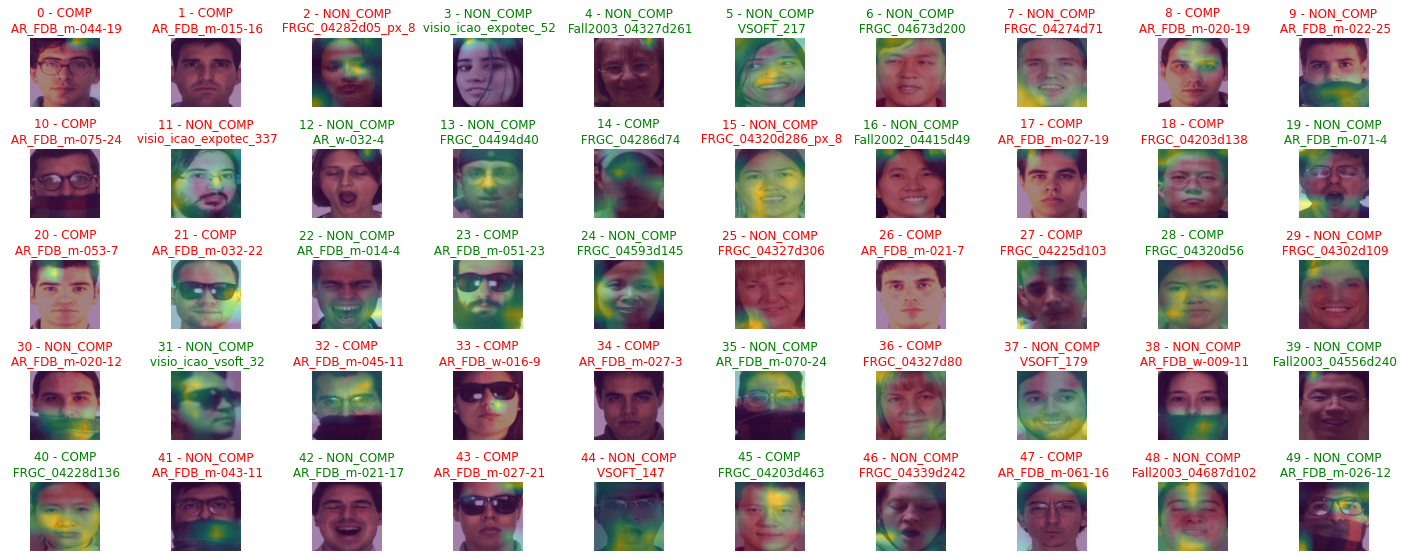

In [12]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [13]:
trainer.finish_experiment()

Finishing Neptune
